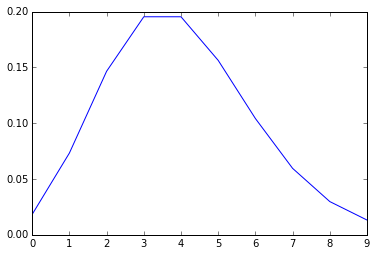

In [27]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

t=8
u=3
s=1
k=10
l=4

        
def poisson(k,l):
    po=[]
    for i in range(k):
        po.append((math.exp(-l)*l**i)/math.factorial(i))
    return po

    

dppo=poisson(k,l)
plt.plot(dppo)
plt.show()


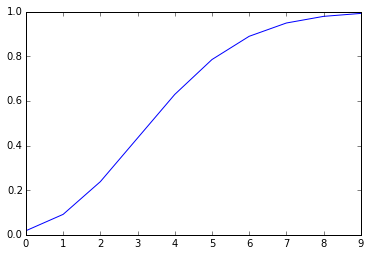

In [28]:
def acumpoisson(k):
    apo=[]
    acu=0
    for i in range(k):
        if i==0:
            apo.append(dppo[i])
            acu=apo[i]
        else:
            apo.append(dppo[i]+acu)
            acu=apo[i]
    return apo

dapo=acumpoisson(k)
plt.plot(dapo)
plt.show()

def acumnormal():
    acn=0
    an=[]
    for i in range(px.length):
        if i==0:
            an.append(px[i])
            acn=an[i]
        else:
            an.append(px[i]+acn)
            acn=an[i]
    return an



In [29]:
def genale(N):
    Ux=[]
    x=0
    x0=9
    while x<N:
        x0=((5*x0)+3)%607
        x=x+1
        Ux.append(float(x0)/607)
    return Ux

def genalev(N):
    Ux=[]
    x=0
    x0=7
    while x<N:
        x0=((5*x0)+3)%607
        x=x+1
        Ux.append(float(x0)/607)
    return Ux


def erf(p):
    invexp=lambda t:np.exp(-t**2)
    y,err=quad(invexp,0,p)
    error=(2/math.sqrt(math.pi))*y
    return error

def invnormal(u,s,t):
    p=genale(t)
    print p
    n=[]
    for i in range(t):
        n.append(u+s*math.sqrt(2)*(1/erf(2*p[i]-1)))
        if n[i]<0:
            n[i]=0
    return n

print invnormal(3,1,t)

[0.07907742998352553, 0.400329489291598, 0.006589785831960461, 0.03789126853377265, 0.19439868204283361, 0.9769357495881383, 0.8896210873146623, 0.45304777594728174]
[1.1541760214696064, 0, 1.3106958096109171, 1.251469437834756, 0.6915167684558923, 4.7190825963518765, 4.938487658770294, 0]


In [30]:
def ppoisson(t):
    p=[]
    p=genalev(t)
    pi=[]
    for i in range(t):
        for j in range(len(dapo)):
            if p[i]<dapo[j]:
                pi.append(j)
                break
    return pi      
print ppoisson(t)

[1, 3, 4, 8, 7, 4, 4, 3]


In [31]:
cola=ppoisson(t)
servicio=invnormal(u,s,t)

[0.07907742998352553, 0.400329489291598, 0.006589785831960461, 0.03789126853377265, 0.19439868204283361, 0.9769357495881383, 0.8896210873146623, 0.45304777594728174]


In [34]:
clientesencola=[]
clientesencola.append(0)
clientesensistema=[]
clientesensistema.append(cola[0])
x=0;
for i in range(t-1):
    x=(cola[i]+x)-servicio[i]
    if x<0:
        x=0
    clientesensistema.append((cola[i+1]+x))    
    clientesencola.append(x)

tabla= [range(t),cola,clientesencola,servicio,clientesensistema]


print "Tiempo"+"  |  "+ "# de Clientes que llegan" +"  |  "+ "# de Clientes en Cola" +"  |  "+ "# de Clientes en Servidor" + "  |  " + "# de Clientes en el Sistema"
for i in range(t): 
    print str(tabla[0][i]) +"       |  "+ str(tabla[1][i]) +"                         |  "    + str("{0:.2f}".format(tabla[2][i])) +"                   |  "+ str("{0:.2f}".format(tabla[3][i])) + "                       |  " +str("{0:.2f}".format(tabla[4][i]))


Tiempo  |  # de Clientes que llegan  |  # de Clientes en Cola  |  # de Clientes en Servidor  |  # de Clientes en el Sistema
0       |  1                         |  0.00                   |  1.15                       |  1.00
1       |  3                         |  0.00                   |  0.00                       |  3.00
2       |  4                         |  3.00                   |  1.31                       |  7.00
3       |  8                         |  5.69                   |  1.25                       |  13.69
4       |  7                         |  12.44                   |  0.69                       |  19.44
5       |  4                         |  18.75                   |  4.72                       |  22.75
6       |  4                         |  18.03                   |  4.94                       |  22.03
7       |  3                         |  17.09                   |  0.00                       |  20.09


In [40]:
tpc=0
tps=0
tpse=0
for i in range(len(cola)):
    tpc=tpc+clientesencola[i]
    tps=tps+clientesensistema[i]
    tpse=tpse+clientesensistema[i]-clientesencola[i]
    
tpc=t/float(tpc)
tpse=t/float(tpse)
tps=t/float(tps)
print "Tiempo promedio en cola\n" + str(tpc)
print "Tiempo promedio en el servidor\n" + str(tpse)
print "Tiempo promedio en el sistema\n" + str(tps)

    

Tiempo promedio en cola
0.106681687386
Tiempo promedio en el servidor
0.235294117647
Tiempo promedio en el sistema
0.0734016065849
